In [26]:
import pandas as pd #For data manipulation
import numpy as np #Separating emotions
import glob #For file directories
import os
import soundfile #Creating sound files
import sys
import librosa #For audio analysis
import librosa.display
#import seaborn as sbn
import matplotlib.pyplot as plt #Plotting
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report #Showing emotion features
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from IPython.display import Audio

import scipy.io.wavfile
from scipy.fftpack import dct

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
import os
import librosa
import soundfile as sf

# Set the frame size and overlap
frame_size = 0.025 # 25ms
frame_stride = 0.0125 # 50% overlap

# Set the home and destination directories
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Framed_Shortened_Cropped/"

# Loop through each file in the home directory
for filename in os.listdir(home):
    if filename.endswith('.wav'):
        # Load the audio file
        file_path = os.path.join(home, filename)
        y, sr = librosa.load(file_path, sr=None)

        # Apply framing
        frame_length = int(round(frame_size * sr))
        frame_step = int(round(frame_stride * sr))
        frames = librosa.util.frame(y, frame_length=frame_length, hop_length=frame_step)

        # Save the framed files in the destination directory
        for i in range(frames.shape[1]):
            framed_file_path = os.path.join(destination, filename)
            sf.write(framed_file_path, frames[:,i], sr)



In [35]:
import os
import numpy as np
from scipy.io import wavfile

# Define frame size and hop size
frame_size = 0.025 # 25 ms
hop_size = 0.010 # 10 ms

# Define window function
window = np.hamming(int(frame_size * sample_rate))

# Set paths for input and output folders
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Framed2_Shortened_Cropped/"

# Iterate over all wave files in the input folder
for filename in os.listdir(home):
    if not filename.endswith('.wav'):
        continue
    filepath = os.path.join(home, filename)

    # Load wave file
    sample_rate, signal = wavfile.read(filepath)

    # Calculate frame and hop sizes in samples
    frame_size_samples = int(frame_size * sample_rate)
    hop_size_samples = int(hop_size * sample_rate)

    # Pad signal if necessary to ensure integer number of frames
    num_frames = int(np.ceil(len(signal) / hop_size_samples))
    num_samples = num_frames * hop_size_samples
    signal = np.pad(signal[:num_samples], (0, num_samples - len(signal)), 'constant')

    # Apply framing
    frames = np.lib.stride_tricks.as_strided(
        signal,
        shape=(num_frames, frame_size_samples),
        strides=(signal.strides[0] * hop_size_samples, signal.strides[0])
    )

    # Apply window function
    frames = frames * window

    # Process each frame as desired

    # Concatenate frames back together
    output_signal = frames.reshape(-1)

    # Write output file to destination folder
    output_filename = os.path.join(destination, filename)
    wavfile.write(output_filename, sample_rate, output_signal)


In [36]:
import librosa
from os import listdir
from os.path import isfile, join
data = []
label = []
Path = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Framed2_Shortened_Cropped/"
files = [f for f in listdir(Path) if isfile(join(Path, f))]
for x in files:
    filePath = Path + x
    label.append(x[0])
    signal, sr = librosa.load(filePath, sr=None)
    #mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 20) 
    mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18) 
    #mfcc_1d = np.ravel(mfcc)
    data.append(mfcc)

In [37]:
data = np.array(data)
data.shape

(992, 18, 648)

In [38]:
X = np.expand_dims(data, axis=3)
X.shape

(992, 18, 648, 1)

In [39]:
label_new = []
for i in range(len(label)):
    if label[i] == 'n': #Neutral
        x=3
    elif label[i] == 'h': #Happy
        x=0
    elif label[i] == 's': #S
        x=1
    elif label[i] == 'a': #Angry
        x = 2
    label_new.append(x)

print(label_new)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, label_new, test_size = 0.2)

In [42]:
X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
print(X_train.shape)

(793, 18, 648, 1)


In [45]:
# This model gives 62% with 30 mfccs, 75.6% for 18 mfccs
# change epochs from 20 - 24
model = Sequential()
from keras.layers import BatchNormalization
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(18, 648, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 18, 648, 64)       640       
                                                                 
 batch_normalization_19 (Bat  (None, 18, 648, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 18, 648, 64)       36928     
                                                                 
 batch_normalization_20 (Bat  (None, 18, 648, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 324, 64)       0         
 2D)                                                             
                                                      

In [46]:
best_val_acc = 0.0
best_epoch = None
num_epochs = 24
count = 0
Epoch_list = [10, 16, 18, 20, 24]
HistoryData = []
Val_loss_Data = []
Val_Acc_Data = []
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
for Loop_Var in Epoch_list:
    # Train the model for one epoch
    history = model.fit(X_train, Y_train, batch_size=32 , epochs=Loop_Var , verbose=1, validation_data=(X_test, Y_test))
    HistoryData.append(history)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)
    Val_loss_Data.append(val_loss)
    Val_Acc_Data.append(val_acc)

    # Check if this epoch had the best validation accuracy so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = Loop_Var
        # Save the model weights for the best epoch
        model.save_weights('best_model_weights.h5')
    count = count + 1
    print(count)
print('Loop Completed')
# Load the weights for the best epoch
model.load_weights('best_model_weights.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)

print("Best epoch: {} with validation accuracy: {}".format(best_epoch, best_val_acc))
print("Test loss: {} Test accuracy: {}".format(test_loss, test_acc))

Epoch 1/10
25/25 [==============================] - 481s 18s/step - loss: 1.6188 - accuracy: 0.4578 - val_loss: 116.9991 - val_accuracy: 0.2412
Epoch 2/10
 5/25 [=====>........................] - ETA: 5:05 - loss: 0.8144 - accuracy: 0.6625

KeyboardInterrupt: 

In [47]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32 , epochs= 20 , verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
25/25 [==============================] - 404s 15s/step - loss: 1.1606 - accuracy: 0.5586 - val_loss: 75.5790 - val_accuracy: 0.2764
Epoch 2/20
25/25 [==============================] - 388s 16s/step - loss: 0.6539 - accuracy: 0.7591 - val_loss: 13.9322 - val_accuracy: 0.2412
Epoch 3/20
25/25 [==============================] - 347s 14s/step - loss: 0.3022 - accuracy: 0.8979 - val_loss: 3.6178 - val_accuracy: 0.3920
Epoch 4/20
25/25 [==============================] - 394s 16s/step - loss: 0.2149 - accuracy: 0.9206 - val_loss: 3.3176 - val_accuracy: 0.3769
Epoch 5/20
25/25 [==============================] - 417s 17s/step - loss: 0.0934 - accuracy: 0.9723 - val_loss: 2.9626 - val_accuracy: 0.4472
Epoch 6/20
25/25 [==============================] - 392s 15s/step - loss: 0.0972 - accuracy: 0.9710 - val_loss: 1.6603 - val_accuracy: 0.5628
Epoch 7/20
25/25 [==============================] - 314s 12s/step - loss: 0.0741 - accuracy: 0.9773 - val_loss: 2.9194 - val_accuracy: 0.5075
Epoc

In [48]:
# Calculate precision and recall
# Get the predicted probabilities for the validation set
y_pred_proba = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Compute precision and recall using scikit-learn metrics
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)


7/7 [==============================] - 25s 2s/step
Precision: 0.6638859797510193
Recall: 0.6130653266331658


Text(0.5, 1.0, 'Baseline: CASIA Anger')

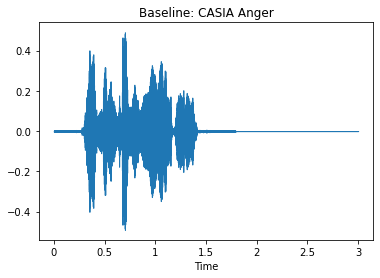

In [50]:
# Print wavefile 
Path = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/a_C_201-angry-liuchanhg.wav"
signal, sr = librosa.load(Path)
librosa.display.waveshow(signal, sr=sr)
plt.title("Baseline: CASIA Anger")

Text(0.5, 1.0, 'Framing + Window: CASIA Anger')

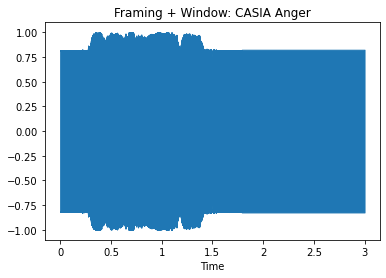

In [53]:
# Print wavefile 
Path = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Histogram_Shortened_Cropped/a_C_201-angry-liuchanhg.wav"
signal, sr = librosa.load(Path)
librosa.display.waveshow(signal, sr=sr)
plt.title("Framing + Window: CASIA Anger")